#**1ª Competição de Dados da SEst UFSCar/USP**
XI Semana da Estatística (SEst UFSCar/USP)

**Compreendendo a Renda Anual de Lojas parceiras para Otimização de decisões em E-commerce**

2023

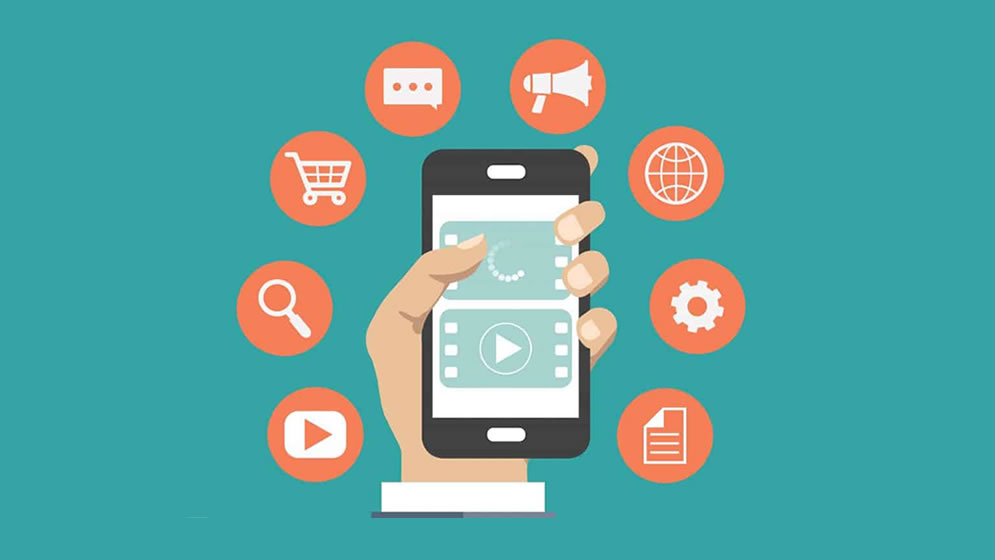

#**Contexto**


Você e seu grupo fazem parte da equipe de dados de uma plataforma de e-commerce líder em um mercado altamente competitivo. Essa plataforma oferece uma infraestrutura digital robusta, permitindo que uma ampla gama de lojas parceiras comercialize seus produtos e serviços de forma eficaz por meio de sua plataforma online. A colaboração com essas lojas parceiras é essencial para o êxito da plataforma, uma vez que a receita da plataforma é gerada principalmente por meio de comissões sobre as vendas realizadas por essas lojas em sua plataforma digital.

A plataforma está interessada em aprimorar sua compreensão da renda de cada loja parceira, por exemplo, como cada variável pode interferir ou explicar a renda. Dessa forma a e-commerce pode aperfeiçoar as estratégias de marketing, distribuição de recursos e fornecimento de insights valiosos aos nossos parceiros.




# **Objetivo**
O objetivo de vocês é auxiliar a plataforma de e-commerce que onde trabalham a compreender a renda de cada loja.

A seguir, apresento algumas sugestões do que podem fazer:

*   Fornecer estatisticas sobre a variável Renda
*   Fazer análises exploratórias e tentar identificar se alguma das variáveis fornecidas no banco de dados interfere na Renda
*   Fazer um modelo de regressão utilizando a variável Renda como variável resposta e interpretar como as variáveis preditoras interferem na Renda.
*   Categorizar a variável Renda e fazer um modelo de classificação e interpretar como as variáveis preditoras interferem na Renda.
*   Fazer uma análise de componentes principais e interpreta-lás para tentar identificar quais as variáveis afetam a renda da loja

As sugestões acima são apenas possíveis abordagens para resolver o problema. Lembrem-se de usar a criatividade para fornecer informações sobre a renda das lojas, e o mais importante é fornecer informações ou insights úteis que ajudem a empresa onde trabalham.

Organizem suas ideias em uma apresentação que será avaliada e dependendo do resultado, será apresentada pelo seu grupo na etapa final.

Boa sorte!!!


# **Descrição dos Dados**

Nossos dados correspondem a uma base de lojas parceiras 47.422 lojas e 17 variáveis listadas abaixo:

*   **ID_LOJA**: Identificação única da loja no sistema.

*   **TIPO_RELACIONAMENTO**: Indicação do tipo de relacionamento da loja com a plataforma de e-commerce.

*  **ESTADO_LOJA**: Estado geográfico onde a loja está localizada.

*  **CATEGORIA_PRODUTO**: Categoria principal de produtos vendidos pela loja, como "Eletrônicos", "Moda", "Alimentos e Bebidas","Saúde e Beleza",etc.

*  **RENDA_ESPERADA**: A renda esperada ou meta de vendas da loja em um ano.

*  **ESTRATÉGIA_VENDAS**: Estratégia de vendas adotada pela loja para atingir suas metas de vendas.

*  **AVAL_SATISFACAO**: Avaliação de satisfação dos clientes em relação à experiência de compra na loja. Pode variar de (0 a 10)

*  **VL_LIMITE_CREDITO_INICIAL_BANCO**: Limite de crédito inicial fornecido pelo banco à loja para operações financeiras.

*  **REGIAO_LOJA**: Região geográfica da sede da loja.

*  **VL_FINANCEIRO_BCB**: Valores financeiros gastos da loja com base em registros do Banco Central.

*  **VL_OPERACAO_CARTAO_BCB**: Valor total de transações de cartão realizadas pela loja com base em registros do Banco Central.

*  **VL_LIMITE_CREDITO_BCB**: Limite de crédito concedido à loja com base em dados do Banco Central.

*  **PONTUACAO_DESEMPENHO**: Pontuação que reflete o desempenho da loja, calculada com base em várias métricas de negócios. Possui valores de (0 a 1000)

*  **TEMPO_EXISTENCIA_ONLINE**: Tempo em meses de existência da loja na plataforma de e-commerce ou online.

*  **AVALIACAO_RISCO**: Avaliação do risco associado às operações da loja. Possui valores de (0 a 1000)

*  **SCORE_INTERNO**: Pontuação gerada de um modelo interno atribuído à loja com base em critérios internos e métricas de desempenho da empresa. Possui valores de (0 a 1000) (Porém nem todas as lojas possuem esse score, pois não forneceram algumas informações)

*  **RENDA**: Renda da loja no final de um ano. (Variável resposta)



# **Dados**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [9]:
df = pd.read_csv("dados.csv",sep = ";")
print(f'Esses dados possuem {df.shape[0]} linhas e {df.shape[1]} colunas')
df.head()

FileNotFoundError: ignored

# **Análise exploratória**

#### Análise inicial: composição do dataset

Vamos verificar o tipo de cada variável

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47422 entries, 0 to 47421
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID_LOJA                          47422 non-null  int64  
 1   TIPO_RELACIONAMENTO              47422 non-null  object 
 2   ESTADO_LOJA                      47422 non-null  object 
 3   CATEGORIA_PRODUTO                47422 non-null  object 
 4   RENDA_ESPERADA                   47422 non-null  int64  
 5   ESTRATEGIA_VENDAS                47422 non-null  object 
 6   AVAL_SATISFACAO                  47412 non-null  float64
 7   VL_LIMITE_CREDITO_INICIAL_BANCO  47422 non-null  int64  
 8   REGIAO_LOJA                      47422 non-null  object 
 9   VL_FINANCEIRO_BCB                47422 non-null  int64  
 10  VL_OPERACAO_CARTAO_CREDITO       47422 non-null  int64  
 11  VL_LIMITE_CREDITO_BCB            47422 non-null  int64  
 12  PONTUACAO_DESEMPEN

In [ ]:
df.describe()

,ID_LOJA,RENDA_ESPERADA,AVAL_SATISFACAO,VL_LIMITE_CREDITO_INICIAL_BANCO,VL_FINANCEIRO_BCB,VL_OPERACAO_CARTAO_CREDITO,VL_LIMITE_CREDITO_BCB,PONTUACAO_DESEMPENHO,TEMPO_EXISTENCIA_ONLINE,AVALIACAO_RISCO,SCORE_INTERNO,RENDA
count,47422.000000,4.742200e+04,47412.000000,47422.000000,4.742200e+04,4.742200e+04,4.742200e+04,47393.000000,47422.000000,47108.000000,23809.000000,4.742200e+04
mean,939364.765151,4.665221e+05,6.139847,90921.513222,2.374812e+06,6.237343e+05,3.609299e+05,576.568502,35.576230,251.077269,562.512411,3.300380e+05
std,19331.590363,5.760590e+06,1.472851,73506.402439,5.217199e+06,1.493863e+06,9.942356e+05,155.532206,11.218387,82.583823,102.478467,2.562023e+05
min,869260.000000,1.000000e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,18.000000,0.000000,26.000000,0.000000e+00
25%,924785.250000,2.000000e+05,5.230000,50000.000000,2.591000e+05,8.540000e+04,1.850000e+04,500.000000,27.000000,150.000000,492.000000,1.988000e+05
50%,939611.500000,3.000000e+05,6.090000,60000.000000,7.444500e+05,2.423500e+05,9.870000e+04,579.000000,34.000000,300.000000,555.000000,2.630000e+05
75%,954668.750000,5.000000e+05,7.080000,110000.000000,2.235775e+06,6.206000e+05,3.159000e+05,669.000000,42.000000,300.000000,630.000000,3.551000e+05
max,983328.000000,1.127000e+09,10.000000,600000.000000,2.483985e+08,7.235740e+07,3.201180e+07,1000.000000,75.000000,1000.000000,1000.000000,6.010300e+06


In [ ]:
variaveis_numericas = df.select_dtypes(include=['number'])
variaveis_numericas = variaveis_numericas.columns

variaveis_categoricas = df.select_dtypes(exclude=['number'])
variaveis_categoricas = variaveis_categoricas.columns

#print(f'CATEGORICAS: \n{variaveis_categoricas}\n')
print(f'Numéricas: \n{variaveis_numericas}\n')
print(f'Categóricas: \n{variaveis_categoricas}')

Numéricas: 
Index(['ID_LOJA', 'RENDA_ESPERADA', 'AVAL_SATISFACAO',
       'VL_LIMITE_CREDITO_INICIAL_BANCO', 'VL_FINANCEIRO_BCB',
       'VL_OPERACAO_CARTAO_CREDITO', 'VL_LIMITE_CREDITO_BCB',
       'PONTUACAO_DESEMPENHO', 'TEMPO_EXISTENCIA_ONLINE', 'AVALIACAO_RISCO',
       'SCORE_INTERNO', 'RENDA'],
      dtype='object')

Categóricas: 
Index(['TIPO_RELACIONAMENTO', 'ESTADO_LOJA', 'CATEGORIA_PRODUTO',
       'ESTRATEGIA_VENDAS', 'REGIAO_LOJA'],
      dtype='object')


Note que variáveis como "ID_LOJA" apesar de apresentarem como numéricas, representam uma informação categórica

In [ ]:
df['ID_LOJA'] = df['ID_LOJA'].astype(str)

#### Tratamento de valores ausentes

Verificando quais colunas apresentam valores ausentes.

In [ ]:
missing_values = df.isnull().sum()

print("Colunas com valores nulos:")
for column_name, num_missing in missing_values.items():
    if num_missing > 0:
        print(f"{column_name}\n\tQuantidade de valores ausentes: {num_missing}")

Colunas com valores nulos:


In [ ]:
# instanciar o imputador
numeric_imputer = SimpleImputer(strategy='median')
df[variaveis_numericas] = numeric_imputer.fit_transform(df[variaveis_numericas])

#### Label encoder

In [ ]:
label_encoder = LabelEncoder()

df[variaveis_categoricas] = df[variaveis_categoricas].apply(label_encoder.fit_transform)
df[variaveis_categoricas]

,TIPO_RELACIONAMENTO,ESTADO_LOJA,CATEGORIA_PRODUTO,ESTRATEGIA_VENDAS,REGIAO_LOJA
0,2,19,0,0,2
1,1,4,5,2,2
2,2,5,0,1,2
3,1,25,5,0,4
4,2,25,0,2,4
...,...,...,...,...,...
47417,1,4,5,0,2
47418,1,25,5,0,4
47419,1,22,1,0,3
47420,0,24,5,0,2


#### Verificando Correlação entre as features

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,ID_LOJA,TIPO_RELACIONAMENTO,ESTADO_LOJA,CATEGORIA_PRODUTO,RENDA_ESPERADA,ESTRATEGIA_VENDAS,AVAL_SATISFACAO,VL_LIMITE_CREDITO_INICIAL_BANCO,REGIAO_LOJA,VL_FINANCEIRO_BCB,VL_OPERACAO_CARTAO_CREDITO,VL_LIMITE_CREDITO_BCB,PONTUACAO_DESEMPENHO,TEMPO_EXISTENCIA_ONLINE,AVALIACAO_RISCO,SCORE_INTERNO,RENDA
ID_LOJA,1.000000,-0.005312,0.019251,-0.000765,0.001486,-0.007346,-0.024263,-0.034847,0.026527,-0.014073,-0.003013,-0.029620,0.000893,0.001541,-0.002734,-0.031114,0.014991
TIPO_RELACIONAMENTO,-0.005312,1.000000,0.004484,-0.084514,0.001633,-0.025715,0.066905,-0.005751,0.010261,0.039439,0.013592,0.010878,0.190876,0.178327,-0.019664,0.008078,-0.040608
ESTADO_LOJA,0.019251,0.004484,1.000000,0.061612,0.004190,0.029061,0.008292,0.099969,0.547389,0.034760,0.000080,0.019413,0.031161,-0.016231,-0.062164,-0.012939,0.118922
CATEGORIA_PRODUTO,-0.000765,-0.084514,0.061612,1.000000,-0.026833,0.061772,-0.107017,0.439442,0.058511,-0.091849,-0.105540,-0.076504,-0.050467,-0.266388,0.032877,-0.029340,-0.013883
RENDA_ESPERADA,0.001486,0.001633,0.004190,-0.026833,1.000000,-0.007327,0.018168,0.003010,0.002669,0.037161,0.050664,0.028504,0.016327,0.010620,-0.006132,0.013648,0.015115
ESTRATEGIA_VENDAS,-0.007346,-0.025715,0.029061,0.061772,-0.007327,1.000000,-0.040589,-0.002793,0.029146,-0.053199,-0.043284,-0.041240,-0.062976,-0.174867,-0.042021,-0.044165,-0.023221
AVAL_SATISFACAO,-0.024263,0.066905,0.008292,-0.107017,0.018168,-0.040589,1.000000,0.240257,0.006562,0.161218,0.164584,0.209505,0.563869,0.202286,0.002847,0.192664,0.032828
VL_LIMITE_CREDITO_INICIAL_BANCO,-0.034847,-0.005751,0.099969,0.439442,0.003010,-0.002793,0.240257,1.000000,0.084738,0.183252,0.151532,0.171262,0.325174,-0.037127,0.011943,0.180479,0.115921
REGIAO_LOJA,0.026527,0.010261,0.547389,0.058511,0.002669,0.029146,0.006562,0.084738,1.000000,-0.003036,-0.009076,0.016094,0.026829,-0.001380,-0.038489,-0.010012,0.080187
VL_FINANCEIRO_BCB,-0.014073,0.039439,0.034760,-0.091849,0.037161,-0.053199,0.161218,0.183252,-0.003036,1.000000,0.625849,0.534387,0.147625,0.136067,-0.033011,0.202008,0.102206


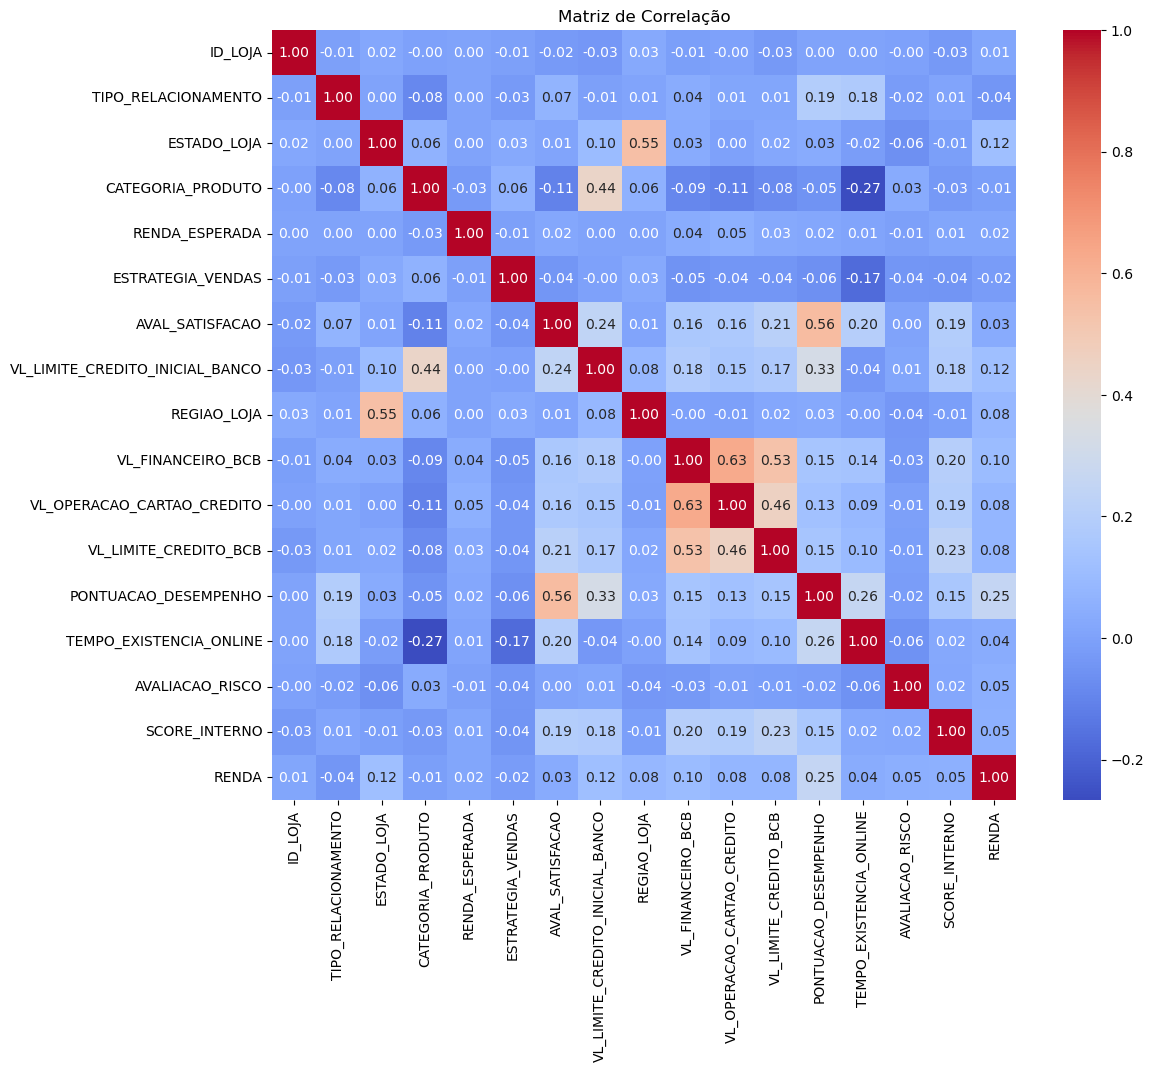

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
# Filtrar e mostrar apenas os pares de variáveis com correlação maior que 0.6
high_correlation_pairs = correlation_matrix[
    (correlation_matrix > 0.5) & (correlation_matrix < 1.0)]

high_correlation_pairs = high_correlation_pairs.unstack().dropna().sort_values(ascending=False)

print("Pares de variáveis com correlação maior que 0.5 e menores que 1.0:\n")
print(high_correlation_pairs)

Pares de variáveis com correlação maior que 0.5 e menores que 1.0:

VL_FINANCEIRO_BCB           VL_OPERACAO_CARTAO_CREDITO    0.625849
VL_OPERACAO_CARTAO_CREDITO  VL_FINANCEIRO_BCB             0.625849
AVAL_SATISFACAO             PONTUACAO_DESEMPENHO          0.563869
PONTUACAO_DESEMPENHO        AVAL_SATISFACAO               0.563869
ESTADO_LOJA                 REGIAO_LOJA                   0.547389
REGIAO_LOJA                 ESTADO_LOJA                   0.547389
VL_FINANCEIRO_BCB           VL_LIMITE_CREDITO_BCB         0.534387
VL_LIMITE_CREDITO_BCB       VL_FINANCEIRO_BCB             0.534387
dtype: float64


#### Balanceamento entre classes

É interessante verificar como a variável alvo está balanceadas para garantir que os algoritmos de ML que utilizaremos obtenham um desempenho não enviesado
- variável alvo vai ser renda?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Modelo**

- Fazer pca?


# **Conclusões**